In [2]:
#import pandas to read the file

import pandas as pd

filename = 'medical_clean.csv'
mrd = pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
#identify initial dataset on which PCA will be run
#scale these variables before PCA begins
#import StandardScaler and scale features

from sklearn.preprocessing import StandardScaler

mrd_cont = ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges']
scaler = StandardScaler()
mrd[mrd_cont] = scaler.fit_transform(mrd[mrd_cont])
mrd[mrd_cont].head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges
0,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.907310,-0.727185,0.765005
1,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,-0.734595,-0.513228,0.715114
2,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-1.128292,-1.319983,0.698635
3,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-1.244503,-1.460517,0.009004
4,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,-1.261991,-1.467285,-1.408991


In [4]:
#export scaled dataset to its own CSV file for submission

mrd[mrd_cont].to_csv('d212_t2scaled.csv', index = False)

In [5]:
#import PCA to start the process
#fit PCA to standardized data and transform
#generate loadings

from sklearn.decomposition import PCA

pca = PCA(n_components=9, random_state=42)
mc_pca = pca.fit_transform(mrd[mrd_cont])

mc_pca_loadings = pd.DataFrame(
    pca.components_.T,  
    columns=["PC" + str(i+1) for i in range(9)], 
    index=mrd_cont)
mc_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Children,0.034648,0.017569,0.145478,0.395755,0.794583,-0.313592,-0.301644,0.003671,-0.000921
Age,0.085575,0.700886,-0.032837,-0.012901,-0.004298,-0.001883,0.017043,0.706532,0.026274
Income,-0.020418,-0.018839,-0.450141,0.535554,0.191642,0.541756,0.423733,0.002360,0.001290
VitD_levels,-0.001888,0.020710,0.629829,0.319084,-0.128375,-0.253208,0.648434,-0.002259,-0.001491
Doc_visits,-0.007354,0.015879,-0.066180,0.672766,-0.560452,-0.172871,-0.445764,0.001271,-0.001114
Full_meals_eaten,-0.019576,0.031624,0.611000,0.043186,0.023566,0.716189,-0.331423,0.010292,-0.001593
Initial_days,0.700611,-0.091104,0.000818,0.003166,-0.019256,0.023959,0.006627,0.031666,-0.706288
TotalCharge,0.701722,-0.080481,0.004250,0.004583,-0.019495,0.023914,0.005224,-0.031325,0.706476
Additional_charges,0.085725,0.701168,-0.026982,-0.008302,0.000217,0.009246,0.009258,-0.706184,-0.036743


In [6]:
#give a clear list of (all 9) PC contributions towards total variance

print(f"Contribution of each PC:")
mc_pca_contr = list(pca.explained_variance_ratio_)
mc_pca_names = list(mc_pca_loadings.columns)
for i in range (len(mc_pca_names)):
    print(f"For {mc_pca_names[i]}: {round(mc_pca_contr[i] * 100, 3)}%")

Contribution of each PC:
For PC1: 22.153%
For PC2: 19.05%
For PC3: 11.468%
For PC4: 11.264%
For PC5: 11.119%
For PC6: 10.904%
For PC7: 10.761%
For PC8: 3.151%
For PC9: 0.13%


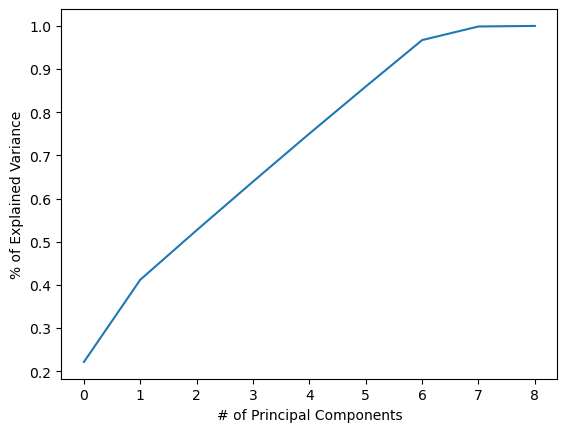

In [7]:
#import matplotlib for creation of scree plot
#generate scree plot

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of Principal Components")
plt.ylabel("% of Explained Variance")
plt.show()

In [8]:
#elbow at PC6 (meaning 7 components should be retained)
#repeat the process from earlier with just these 7 PCs
#generate loadings

final_pca = PCA(n_components=7, random_state=42)
final_pca.fit(mrd[mrd_cont])

final_mc_pca = final_pca.transform(mrd[mrd_cont])

final_mc_pca_loadings = pd.DataFrame(
    final_pca.components_.T, 
    columns=["PC" + str(i+1) for i in range(7)],  
    index=mrd_cont)

final_mc_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Children,0.034648,0.017569,0.145478,0.395755,0.794583,-0.313592,-0.301644
Age,0.085575,0.700886,-0.032837,-0.012901,-0.004298,-0.001883,0.017043
Income,-0.020418,-0.018839,-0.450141,0.535554,0.191642,0.541756,0.423733
VitD_levels,-0.001888,0.020710,0.629829,0.319084,-0.128375,-0.253208,0.648434
Doc_visits,-0.007354,0.015879,-0.066180,0.672766,-0.560452,-0.172871,-0.445764
Full_meals_eaten,-0.019576,0.031624,0.611000,0.043186,0.023566,0.716189,-0.331423
Initial_days,0.700611,-0.091104,0.000818,0.003166,-0.019256,0.023959,0.006627
TotalCharge,0.701722,-0.080481,0.004250,0.004583,-0.019495,0.023914,0.005224
Additional_charges,0.085725,0.701168,-0.026982,-0.008302,0.000217,0.009246,0.009258


In [9]:
#give a clear list of PC contributions now that dataset has been reduced
#give a clear % of total variance explained by our 7 PCs

print(f"Amount of variance accounted for by each PC:")
mc_pca_contr = list(final_pca.explained_variance_ratio_)
mc_pca_names = list(final_mc_pca_loadings.columns)
for i in range(len(mc_pca_names)):
    print(f"For {mc_pca_names[i]}: {round(mc_pca_contr[i] * 100, 3)}%")

print(f"These 7 PCs explain {round(sum(final_pca.explained_variance_ratio_ * 100), 3)}% of the total variance.")

Amount of variance accounted for by each PC:
For PC1: 22.153%
For PC2: 19.05%
For PC3: 11.468%
For PC4: 11.264%
For PC5: 11.119%
For PC6: 10.904%
For PC7: 10.761%
These 7 PCs explain 96.719% of the total variance.


In [10]:
#returning to our question, import libraries/packages for a decision tree
#identify X and y for splitting of data to predict readmission
#use 70/30 split
#run the decision tree
#generate accuracy score and classification report for the model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

pca_features = pd.DataFrame(final_mc_pca, columns=["PC" + str(i+1) for i in range(7)])

pca_features["ReAdmis"] = mrd["ReAdmis"].values

X = pca_features.drop(columns=["ReAdmis"])
y = pca_features["ReAdmis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9623333333333334
              precision    recall  f1-score   support

          No       0.97      0.97      0.97      1934
         Yes       0.95      0.95      0.95      1066

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

